# Figure 3D

# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import symbols, solve, simplify
import seaborn as sb
import pandas as pd
from scipy.optimize import curve_fit
import sympy as sp
plt.rcParams.update({'font.size': 18})

# Definitions

Function to fit a curve with an Hill function

In [2]:
def model(x, a, b, c):
    return c*x**a/(x**a+b**a)

def Hill(z,x, params=[1,1,1]):
    y= z-min(z)
    popt, _ = curve_fit(model, x, y, params)
    a,b,c = popt
    fit= c*x**a/(x**a+ b**a)
    
    return [round(a,2), round(b,2), round(c,2)]

# Model 

Definition of the parameters of the model

In [3]:
Ap,kMM3,Er,KMM3,vMM4,KMM4 = symbols('Ap kMM3 Er KMM3 vMM4 KMM4')
I, kMM1, Er, KMM1, vMM2,KMM2 = symbols('I kMM1 Er KMM1 vMM2 KMM2')
vb, vo, Ap, Ka, Ki, I, k, O = symbols('vb vo Ap Ka Ki I k O')

Evolution equation for the activator Ap

In [4]:
expr_Ap = kMM3*Er*(1-Ap)/(KMM3+(1-Ap))-vMM4*Ap/(KMM4+Ap)
sol_Ap= solve(expr_Ap, Ap)[1] 

# Function to compute Ap as a function of the other parameters:  
def exprAp(kMM3_v=12,Er_v=0.5,KMM3_v=0.05,vMM4_v=1,KMM4_v=0.05):
    solAp= sol_Ap.subs([(kMM3,kMM3_v), (Er,Er_v), (KMM4,KMM4_v), (vMM4,vMM4_v), (KMM3,KMM3_v)]) 
    return solAp

Evolution equation for the inhibitor I

In [5]:
expr_I = -kMM1*Er*I/(KMM1+I)+vMM2*(1-I)/(KMM2+(1-I))
sol_I= solve(expr_I, I)[0] 

# Function to compute I as a function of the other parameters: 
def exprI(kMM1_v=12,Er_v=0.5,KMM1_v=0.05,vMM2_v=1,KMM2_v=0.05): 
    solI= sol_I.subs([(kMM1,kMM1_v), (Er,Er_v), (KMM1,KMM1_v), (vMM2,vMM2_v), (KMM2,KMM2_v)]) 
    return solI 

Compute Otx and define a function ExprOtx that compute Otx as a function of all the parameters of the equation

In [6]:
expr_Otx = vb+ vo*Ap/((Ka*(1+I/Ki))+Ap)-k*O
sol_Otx= solve(expr_Otx, O)[0]  

# Function to compute Otx as a function of the other parameters
def exprOtx(Ap_v, I_v, vb_v=0.001,vo_v=1,Ka_v=0.1,Ki_v=0.1,k_v=0.2, Omax=1, Obas=0): 
    solOtx= [sol_Otx.subs([(Ap, Ap_v[i]), (I, I_v[i]), (vb,vb_v), (vo,vo_v), (Ka,Ka_v), (Ki,Ki_v), (k,k_v)])*Omax +Obas for i in range(len(Ap_v))] 
    return solOtx

# Import the experimental data

In [7]:
#read the excel file with the experimental data
data_S1 = pd.read_excel('./ExpData.xlsx', sheet_name='Cell surface contacts')
df_S1 = pd.DataFrame(data_S1)

data_Fig3D = pd.read_excel('./ExpData.xlsx', sheet_name='Fig 3D')
df_Fig3D = pd.DataFrame(data_Fig3D)

Experimental data figure 1C

In [8]:
# Reltive area of cell surface contact with FGF expressing cells (divided by cell type)
a65_RelContactArea_A = np.array(df_S1['a6.5 S1'].values.tolist())[0:25] 
a66_RelContactArea_A = np.array(df_S1['a6.6 S1'].values.tolist())[0:25] 
a67_RelContactArea_A = np.array(df_S1['a6.7 S1'].values.tolist())[0:25] 
a68_RelContactArea_A = np.array(df_S1['a6.8 S1'].values.tolist())[0:25] 

Experimental data figure 3D

In [9]:
# Levels of Erk fluorescence 
mean_Erk = np.array(df_Fig3D['mean_Erk'].values.tolist())
std_Erk = np.array(df_Fig3D['SEM_Erk'].values.tolist())

# Levels of Otx expression
mean_Otx = np.array(df_Fig3D['mean_Otx'].values.tolist())
std_Otx = np.array(df_Fig3D['SEM_Otx'].values.tolist())

# Rearrange the experimental data 
mean_Erk_a65 = mean_Erk[0]
mean_Erk_a66 = mean_Erk[1]
mean_Erk_a67 = mean_Erk[2]
mean_Erk_a68 = mean_Erk[3]

mean_Erk_a65_E = mean_Erk[4]
mean_Erk_a66_E = mean_Erk[5]
mean_Erk_a67_E = mean_Erk[6]
mean_Erk_a68_E = mean_Erk[7]

std_Erk_a65 = std_Erk[0]
std_Erk_a66 = std_Erk[1]
std_Erk_a67 = std_Erk[2]
std_Erk_a68 = std_Erk[3]

std_Erk_a65_E = std_Erk[4]
std_Erk_a66_E = std_Erk[5]
std_Erk_a67_E = std_Erk[6]
std_Erk_a68_E = std_Erk[7]

mean_Otx_a65 = mean_Otx[0]
mean_Otx_a66 = mean_Otx[1]
mean_Otx_a67 = mean_Otx[2]
mean_Otx_a68 = mean_Otx[3]

mean_Otx_a65_E = mean_Otx[4]
mean_Otx_a66_E = mean_Otx[5]
mean_Otx_a67_E = mean_Otx[6]
mean_Otx_a68_E = mean_Otx[7]

std_Otx_a65 = std_Otx[0]
std_Otx_a66 = std_Otx[1]
std_Otx_a67 = std_Otx[2]
std_Otx_a68 = std_Otx[3]

std_Otx_a65_E = std_Otx[4]
std_Otx_a66_E = std_Otx[5]
std_Otx_a67_E = std_Otx[6]
std_Otx_a68_E = std_Otx[7]

mean_Erk_ctrl = mean_Erk[0:4]
mean_Erk_E = mean_Erk[4:8]
mean_Otx_ctrl = mean_Otx[0:4]
mean_Otx_E = mean_Otx[4:8]


# Results

## Figure 3D

### Model predictions

In [10]:
# Normalize the experimental data, to obtain Erk activity 
mean_Erk_star = [mean_Erk[i]/3200 for i in range(len(mean_Erk))]

std_Erk_a65_star = std_Erk_a65/3200
std_Erk_a66_star = std_Erk_a66/3200
std_Erk_a67_star = std_Erk_a67/3200
std_Erk_a68_star = std_Erk_a68/3200

std_Erk_a65_E_star = std_Erk_a65_E/3200
std_Erk_a66_E_star = std_Erk_a66_E/3200
std_Erk_a67_E_star = std_Erk_a67_E/3200
std_Erk_a68_E_star = std_Erk_a68_E/3200

# Select the data of the control embryos
mean_Erk_ctrl_star =  mean_Erk_star[0:4]

# Select the data of the ephrin inhibited embryos
mean_Erk_E_star =  mean_Erk_star[4:8]

In [11]:
# Normalize the exp data to obtain Otx expression
mean_Otx_star = [mean_Otx[i]/120 for i in range(len(mean_Otx))]

mean_Otx_a65_star = mean_Otx_a65/120 
mean_Otx_a66_star = mean_Otx_a66/120 
mean_Otx_a67_star = mean_Otx_a67/120 
mean_Otx_a68_star = mean_Otx_a68/120 

std_Otx_a65_star = std_Otx_a65/120
std_Otx_a66_star = std_Otx_a66/120
std_Otx_a67_star = std_Otx_a67/120
std_Otx_a68_star = std_Otx_a68/120

mean_Otx_a65_E_star = mean_Otx_a65_E/120 
mean_Otx_a66_E_star = mean_Otx_a66_E/120 
mean_Otx_a67_E_star = mean_Otx_a67_E/120 
mean_Otx_a68_E_star = mean_Otx_a68_E/120 

std_Otx_a65_E_star = std_Otx_a65_E/120
std_Otx_a66_E_star = std_Otx_a66_E/120
std_Otx_a67_E_star = std_Otx_a67_E/120
std_Otx_a68_E_star = std_Otx_a68_E/120

# Fit all the exp data (Erk star, Otx_star) with an Hill function 
par = (5, 0.08, 10)
a,b,c = Hill(np.array(mean_Otx_star), mean_Erk_star, par)

Erk_temp= np.linspace(0,1,100)
Hill_f = [c*Erk_temp[i]**a/(Erk_temp[i]**a+b**a) for i in range(len(Erk_temp))]

In [12]:
# Compute Otx level with our model for each data point 
Ap_pred = [exprAp(Er_v=mean_Erk_ctrl_star[i]) for i in range(len(mean_Erk_ctrl_star))]
I_pred = [exprI(Er_v=mean_Erk_ctrl_star[i]) for i in range(len(mean_Erk_ctrl_star))]

Ap_pred_E = [exprAp(Er_v=mean_Erk_E_star[i]) for i in range(len(mean_Erk_E_star))]
I_pred_E = [exprI(Er_v=mean_Erk_E_star[i]) for i in range(len(mean_Erk_E_star))]

Otx_pred_a = exprOtx(Ap_v=Ap_pred,I_v=I_pred)
Otx_pred_E_a = exprOtx(Ap_v=Ap_pred_E,I_v=I_pred_E)

### Comparison with experimental data

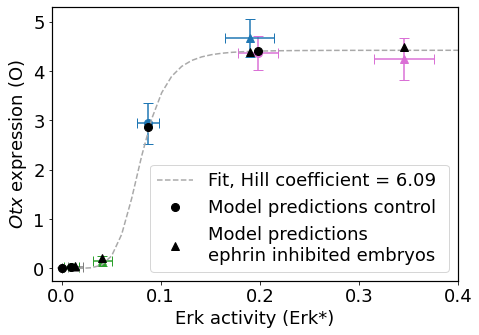

In [13]:
fig= plt.figure(figsize=(7,5))
plt.errorbar(mean_Erk_ctrl_star[0], mean_Otx_a65_star, std_Otx_a65_star, std_Erk_a65_star, marker='o',markersize=8,color='orchid', capsize=5,mfc='orchid', mec='orchid', ls='none', zorder=1)
plt.errorbar(mean_Erk_ctrl_star[1], mean_Otx_a66_star, std_Otx_a66_star, std_Erk_a66_star, marker='o',markersize=8,color='tab:green', capsize=5,mfc='tab:green', mec='tab:green', ls='none', zorder=1)
plt.errorbar(mean_Erk_ctrl_star[2], mean_Otx_a67_star, std_Otx_a67_star, std_Erk_a67_star, marker='o',markersize=8,color='tab:blue', capsize=5,mfc='tab:blue', mec='tab:blue', ls='none', zorder=1)
plt.errorbar(mean_Erk_ctrl_star[3], mean_Otx_a68_star, std_Otx_a68_star, std_Erk_a68_star, marker='o',markersize=8,color='grey', capsize=5,mfc='grey', mec='grey', ls='none', zorder=1)

plt.errorbar(mean_Erk_E_star[0], mean_Otx_a65_E_star, std_Otx_a65_E_star, std_Erk_a65_E_star, marker='^',markersize=8,color='orchid', capsize=5,mfc='orchid', mec='orchid', ls='none', zorder=1)
plt.errorbar(mean_Erk_E_star[1], mean_Otx_a66_E_star, std_Otx_a66_E_star, std_Erk_a66_E_star, marker='^',markersize=8,color='tab:green', capsize=5,mfc='tab:green', mec='tab:green', ls='none', zorder=1)
plt.errorbar(mean_Erk_E_star[2], mean_Otx_a67_E_star, std_Otx_a67_E_star, std_Erk_a67_E_star, marker='^',markersize=8,color='tab:blue', capsize=5,mfc='tab:blue', mec='tab:blue', ls='none', zorder=1)
plt.errorbar(mean_Erk_E_star[3], mean_Otx_a68_E_star, std_Otx_a68_E_star, std_Erk_a68_E_star, marker='^',markersize=8,color='grey', capsize=5,mfc='grey', mec='grey', ls='none', zorder=1)

plt.plot(Erk_temp,Hill_f,'--', color='darkgrey', label= f'Fit, Hill coefficient = {a} ')

plt.plot(mean_Erk_ctrl_star,Otx_pred_a, color='black', marker='o', markersize=8, linestyle='none', label='Model predictions control', zorder=2)
plt.plot(mean_Erk_E_star,Otx_pred_E_a, color='black', marker='^', markersize=8, linestyle='none', label='Model predictions \nephrin inhibited embryos', zorder=2)

ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)
    
plt.xlim([-0.01,0.4])
plt.legend()
plt.ylabel('$Otx$ expression (O)')
plt.xlabel('Erk activity (Erk*)')
plt.tight_layout()
plt.show()